## 1. Import Library

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

## 2. Data Understanding

### Load Dataset

In [209]:
cardio_disease = pd.read_csv("cardiovascular.csv")
cardio_disease 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [210]:
cardio_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Berdasarkan informasi dataset tersebut dapat diketahui bahwa:
- jumlah data : 70000
- jumlah label : 13 kolom
- Label target : cardio (1 = memiliki penyakit cardiovascular, 0 = tidak)


In [211]:
cardio_disease.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
cardio_disease['age'] = (cardio_disease['age'] / 365).astype(int)

# Tambahin BMI
cardio_disease['BMI'] = cardio_disease['weight'] / ((cardio_disease['height'] / 100) ** 2)

In [213]:
cardio_disease

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [214]:
# Ambil hanya kolom numerikal
numeric_cols = cardio_disease.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = cardio_disease[numeric_cols].quantile(0.25)
Q3 = cardio_disease[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((cardio_disease[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (cardio_disease[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
cardio_disease = cardio_disease[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
cardio_disease.shape

(37616, 14)

## 3. Exploratory Data Analysis

### Cek Distribusi Target

C:\Users\User\AppData\Local\Temp\ipykernel_14288\2497484955.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cardio', data=cardio_disease, palette='Set1')


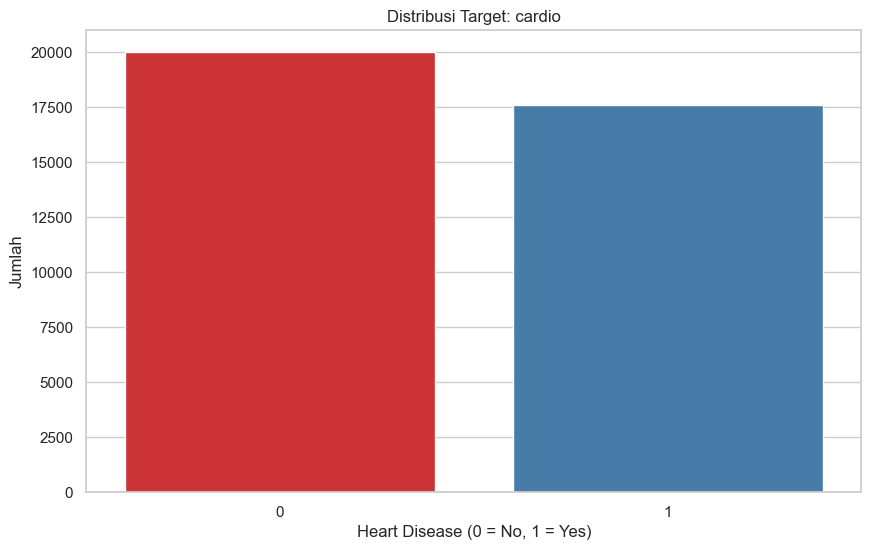

In [215]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

sns.countplot(x='cardio', data=cardio_disease, palette='Set1')
plt.title('Distribusi Target: cardio')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan hasil visualisasi distribusi target cardiovascular:

- 0 tidak memiliki penyakit jantung ~ 35000 sampel.
- 1 terdapat penyakit jantung ~ 35000 sampel.
- Keseimbangan pada kelas ini sangat baik karena tidak memerlukan penyeimbang data seperti oversampling atau undersampling

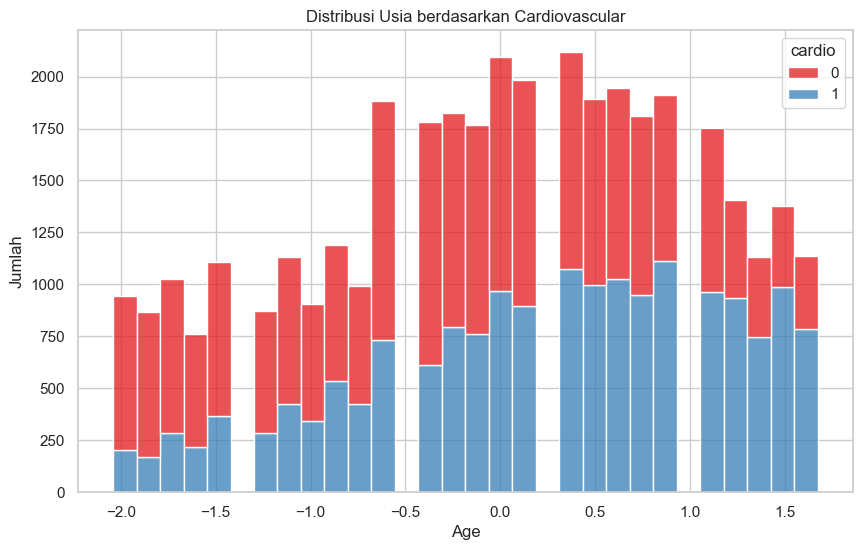

In [240]:
sns.histplot(data=cardio_disease, x='age', hue='cardio', multiple='stack', bins=30, palette='Set1')
plt.title('Distribusi Usia berdasarkan Cardiovascular')
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan hasil visualisasi :

- Kasus penyakit jantung sering terjadi umur ~40 tahun sapai ~65 tahun
- Kasus penyakit jantung paling banyak terjadi pada usia 50 - 65 tahun

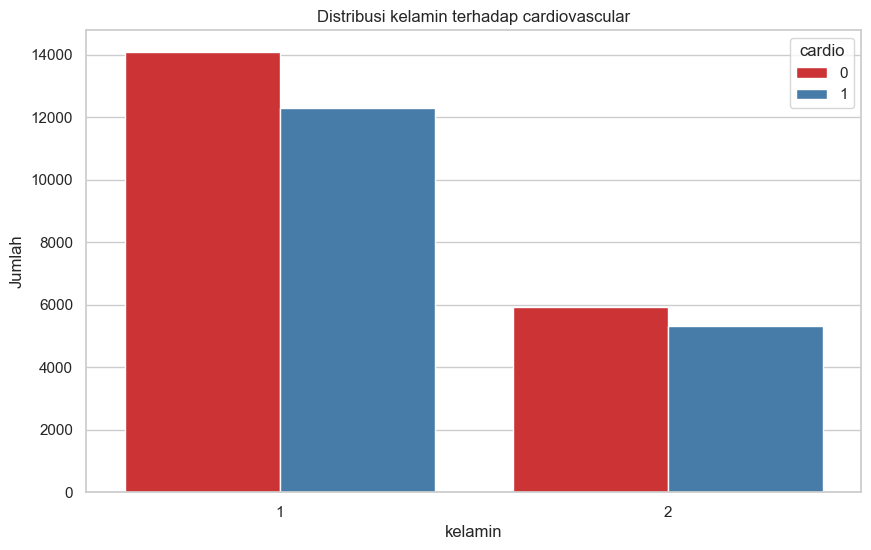

In [241]:
sns.countplot(x='gender', hue='cardio', data=cardio_disease, palette='Set1')
plt.title('Distribusi kelamin terhadap cardiovascular')
plt.xlabel('kelamin')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan hasil visualisasi: 

1 = perempuan, 2 = laki-laki

- perempuan mendominasi penyakik cardiovascular
- laki-laki terlihat cukup banyak tetapi tidak sebanyak perempuan

### Korelasi antar fitur numerik

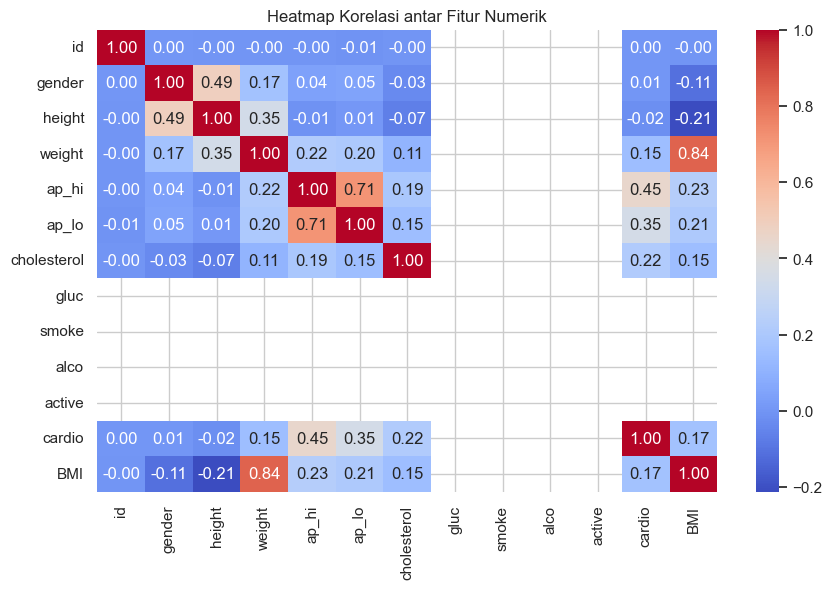

In [218]:
numeric_features = cardio_disease.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(cardio_disease[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antar Fitur Numerik')
plt.show()

Berdasarkan heatmap korelasi antar fitur numerik, dapat disimpulkan bahwa beberapa fitur menunjukkan hubungan yang cukup signifikan satu sama lain. 

Terlihat bahwa BMI memiliki korelasi tinggi terhadap weight (0.84), yang wajar karena BMI merupakan fungsi dari berat dan tinggi badan. Korelasi positif juga terlihat antara ap_hi (tekanan darah sistolik) dan cardio (0.45), serta cholesterol dan cardio (0.22), yang mengindikasikan bahwa tekanan darah dan kadar kolesterol cenderung meningkat pada pasien dengan penyakit cardiovascular. Sementara itu, fitur seperti smoke, alco, dan active menunjukkan korelasi rendah terhadap variabel target cardio, yang bisa jadi tidak terlalu berpengaruh dalam model prediksi. Korelasi yang rendah antar sebagian besar fitur juga menunjukkan rendahnya multikolinearitas, yang baik untuk kestabilan model pembelajaran mesin.

## 4. Data Preparation

### Mengecek Missing Value

In [219]:
total_rows = cardio_disease.shape[0]
missing_data = cardio_disease.isnull().sum()
percent_missing = (missing_data / total_rows) * 100 

# Membuat DataFrame baru untuk hasil
missing_values_df = pd.DataFrame({
    'Jumlah Data Hilang': missing_data,
    'Persentase Data Hilang': percent_missing.map('{:.2f}%'.format)
})

# Menampilkan tabel
print(missing_values_df)

             Jumlah Data Hilang Persentase Data Hilang
id                            0                  0.00%
age                           0                  0.00%
gender                        0                  0.00%
height                        0                  0.00%
weight                        0                  0.00%
ap_hi                         0                  0.00%
ap_lo                         0                  0.00%
cholesterol                   0                  0.00%
gluc                          0                  0.00%
smoke                         0                  0.00%
alco                          0                  0.00%
active                        0                  0.00%
cardio                        0                  0.00%
BMI                           0                  0.00%


Berdasarkan hasil pengecekan, tidak ditemukan nilai yang hilang (missing values) dalam dataset. Oleh karena itu, tidak diperlukan langkah tambahan untuk imputasi atau penghapusan data. Dataset siap digunakan untuk tahap analisis atau pemodelan lebih lanjut.

In [220]:
print("Jumlah baris sebelum:", cardio_disease.shape[0])
print("Jumlah duplikat:", cardio_disease.duplicated().sum())
cardio_disease = cardio_disease.drop_duplicates()
print("Jumlah baris setelah menghapus duplikat:", cardio_disease.shape[0])

Jumlah baris sebelum: 37616
Jumlah duplikat: 0
Jumlah baris setelah menghapus duplikat: 37616


Pemeriksaan data menunjukkan bahwa tidak terdapat baris duplikat dalam dataset. Ini menunjukkan bahwa data sudah bersih dan siap digunakan untuk tahap analisis atau pemodelan tanpa perlu pembersihan lebih lanjut terkait duplikasi.

In [221]:
cardio_disease.drop(['id', 'active', 'smoke', 'alco'], axis=1, inplace=True)

In [222]:
cardio_disease.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,1,34.927679
3,48,2,169,82.0,150,100,1,1,1,28.710479
6,60,1,157,93.0,130,80,3,1,0,37.729725
8,48,1,158,71.0,110,70,1,1,0,28.440955


In [ ]:
scaler = StandardScaler()
num_cols = ['age', 'weight', 'ap_hi' , 'ap_lo']
cardio_disease[num_cols] = scaler.fit_transform(cardio_disease[num_cols])

cardio_disease.sample(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,BMI
38923,0.038471,1,170,-0.168401,1.022045,1.146256,1,1,1,-0.600119
47619,-0.406986,1,173,0.257675,-1.110966,-1.496569,1,1,0,-0.403151
22672,-0.258500,2,173,-0.168401,-0.399962,-0.175157,1,1,0,-0.795890
2667,0.335443,1,169,0.002029,-1.110966,-0.175157,1,1,1,-0.367913
5148,1.077872,2,156,-0.253616,0.311042,1.146256,1,1,1,0.371161
57566,-1.000929,1,171,-0.253616,-0.399962,-0.175157,1,1,1,-0.746917
60196,-0.406986,1,157,0.342890,2.444053,2.467668,1,1,1,0.954134
49037,0.483929,1,155,-0.594477,-1.110966,-1.496569,1,1,0,0.066042
37016,-1.297901,1,161,-1.617058,1.022045,1.146256,1,1,1,-1.487498
49550,-1.149415,1,165,-0.594477,-0.399962,-0.175157,1,1,0,-0.681538


Tujuan scaling ini adalah untuk memastikan semua fitur memiliki skala yang seragam sehingga model machine learning dapat belajar secara optimal dan tidak bias terhadap fitur tertentu yang memiliki rentang nilai besar.

### Split Data

In [243]:
X = cardio_disease.drop(columns=['cardio'])
y = cardio_disease['cardio'].astype(int)  # pastikan integer


# Split dataset menjadi training dan testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset setelah splitting
print("Ukuran data latih:", X_train.shape, y_train.shape)
print("Ukuran data uji:", X_test.shape, y_test.shape)

Ukuran data latih: (30092, 9) (30092,)
Ukuran data uji: (7524, 9) (7524,)


In [244]:
print("Distribusi kelas:", np.bincount(y_train))

Distribusi kelas: [16006 14086]


## 5. Modelling

### XGBClassifier

In [245]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Melatih model
xgb.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluasi
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
roc_xgb = roc_auc_score(y_test, y_proba_xgb)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:01:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### LightGBM Classifier

In [246]:
lgb = LGBMClassifier(random_state=42)

# Melatih model
lgb.fit(X_train, y_train)

# Prediksi
y_pred_lgb = lgb.predict(X_test)
y_proba_lgb = lgb.predict_proba(X_test)[:, 1]

# Evaluasi
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
report_lgb = classification_report(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb, average='weighted')
recall_lgb = recall_score(y_test, y_pred_lgb, average='weighted')
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')
roc_lgb = roc_auc_score(y_test, y_proba_lgb)

[LightGBM] [Info] Number of positive: 14086, number of negative: 16006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 30092, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.468098 -> initscore=-0.127782
[LightGBM] [Info] Start training from score -0.127782


### Logistic Regression

In [247]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Mengevaluasi performa model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
roc_logreg = roc_auc_score(y_test, y_proba_logreg)

### Random Forest

In [248]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
roc_rf = roc_auc_score(y_test, y_proba_rf)

## 6. Evaluasi Model

### XGBClassifier

In [249]:
metrics_xgb = pd.DataFrame({
    "Matriks": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC Score"],
    "Score": [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_xgb]
})

metrics_xgb

,Matriks,Score
0,Accuracy,0.731792
1,Precision,0.733824
2,Recall,0.731792
3,F1-Score,0.729307
4,ROC AUC Score,0.787201


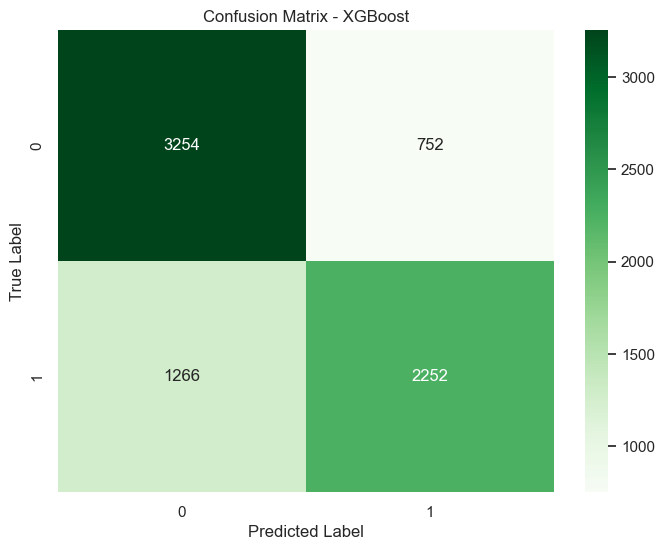

In [250]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

Model XGBoost Classifier menunjukkan performa yang sangat baik dalam mendeteksi penyakit cardiovascular berdasarkan data yang diberikan. Dengan akurasi sebesar 73,18%, model ini mampu mengklasifikasikan data dengan cukup tepat. Nilai precision (73,38%) dan recall (73,18%) yang seimbang menunjukkan bahwa model tidak bias terhadap salah satu kelas dan mampu mengenali kasus positif maupun negatif secara konsisten. Nilai F1-score sebesar 72,93% mengindikasikan keseimbangan yang baik antara presisi dan sensitivitas. Sementara itu, ROC AUC Score sebesar 78,72% mencerminkan kemampuan model yang tinggi dalam membedakan antara dua kelas.

### LightGBM Classifier

In [251]:
metrics_lgb = pd.DataFrame({
    "Matriks": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC Score"],
    "Score": [accuracy_lgb, precision_lgb, recall_lgb, f1_lgb, roc_lgb]
})

metrics_lgb

,Matriks,Score
0,Accuracy,0.736975
1,Precision,0.739307
2,Recall,0.736975
3,F1-Score,0.734458
4,ROC AUC Score,0.794682


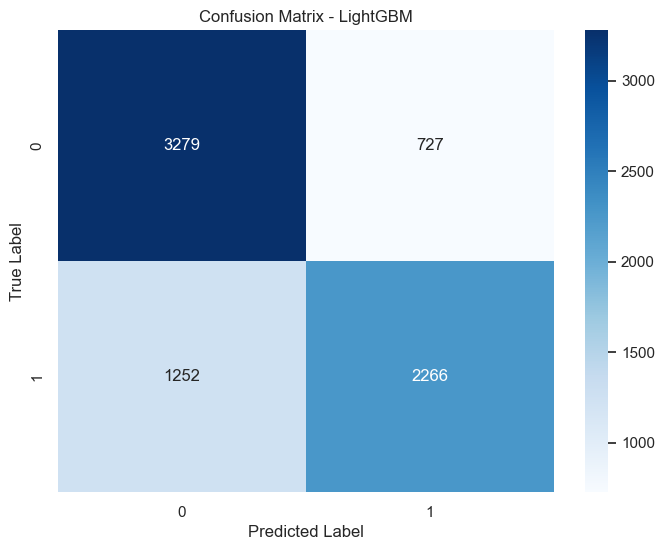

In [252]:
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LightGBM")
plt.show()

Model LightGBM Classifier menunjukkan performa yang baik dalam klasifikasi penyakit cardiovascular. Dengan akurasi sebesar 73,70%, model ini sedikit lebih unggul dibandingkan XGBoost. Nilai precision (73,93%) dan recall (73,70%) yang tinggi menunjukkan bahwa model ini mampu memprediksi kedua kelas dengan baik dan seimbang. F1-score sebesar 73,44% juga memperkuat bukti bahwa model ini efektif dalam menjaga keseimbangan antara false positives dan false negatives. ROC AUC Score sebesar 79,47% menandakan kemampuan model dalam membedakan antara pasien yang memiliki dan tidak memiliki penyakit cardiovascular secara sangat baik.

### Logistic Regression

In [253]:
# Menampilkan dalam DataFrame
metrics_logreg = pd.DataFrame({
    "Matriks": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC Score"],
    "Score": [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_logreg]
})

metrics_logreg

,Matriks,Score
0,Accuracy,0.732057
1,Precision,0.735895
2,Recall,0.732057
3,F1-Score,0.728631
4,ROC AUC Score,0.791086


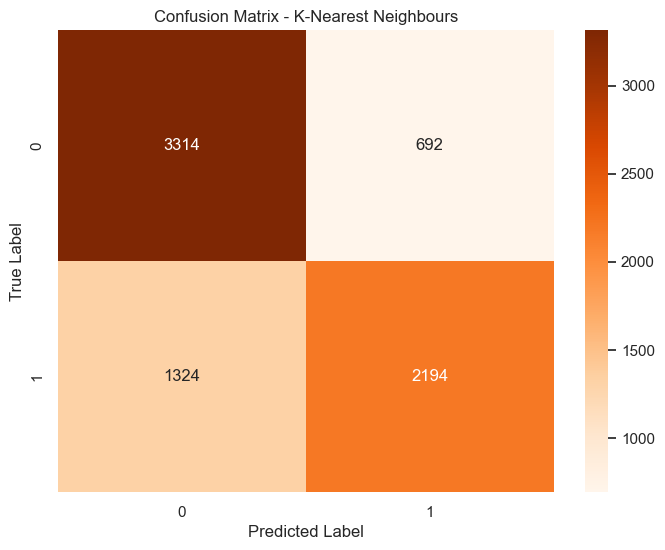

In [254]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Oranges", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - K-Nearest Neighbours")
plt.show()

Model Logistic Regression menunjukkan performa yang kompetitif dalam memprediksi penyakit cardiovascular. Dengan akurasi sebesar 73,21%, model ini memberikan hasil klasifikasi yang cukup baik. Nilai precision (73,59%) dan recall (73,21%) yang seimbang mengindikasikan bahwa model ini konsisten dalam mengenali kedua kelas. F1-score sebesar 72,86% menunjukkan bahwa model menjaga keseimbangan prediksi. Meskipun model ini lebih sederhana dibandingkan XGBoost atau LightGBM, ROC AUC Score sebesar 79,11% menunjukkan bahwa Logistic Regression tetap memiliki kemampuan dalam membedakan antara pasien yang memiliki dan tidak memiliki penyakit.

### Random Forest

In [255]:
# Menampilkan dalam DataFrame
metrics_rf = pd.DataFrame({
    "Matriks": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"],
    "Score": [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_rf]
})

metrics_rf

,Matriks,Score
0,Accuracy,0.700691
1,Precision,0.700244
2,Recall,0.700691
3,F1-Score,0.700231
4,ROC AUC,0.757720


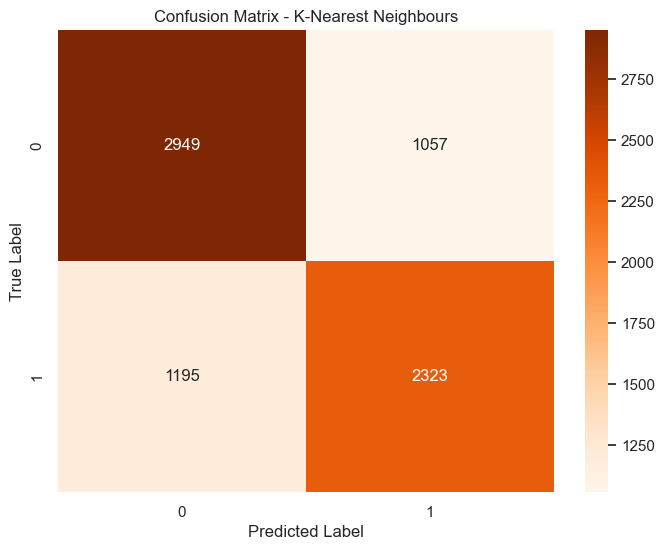

In [256]:

cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - K-Nearest Neighbours")
plt.show()

Model Random Forest Classifier memberikan hasil klasifikasi yang cukup solid dalam mendeteksi penyakit cardiovascular. Dengan akurasi sebesar 70,07%, model ini menunjukkan performa yang stabil namun sedikit lebih rendah dibandingkan Logistic Regression, XGBoost, maupun LightGBM. Nilai precision (70,02%), recall (70,07%), dan F1-score (70,02%) yang hampir identik menunjukkan konsistensi model dalam mengklasifikasikan data, meskipun tanpa keunggulan signifikan. Sementara itu, ROC AUC Score sebesar 75,77% menunjukkan bahwa model masih memiliki kemampuan yang baik dalam membedakan antara pasien yang memiliki dan tidak memiliki penyakit.